In [43]:
import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras



In [44]:
import keras

In [45]:
import tensorflow as tf

In [46]:
image_directory = '/home/kawaii/opencvprojects/Maliria Detections/imagesOfMalaria/'

SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        #we are giving label 0 for parasitised image
        label.append(0)


In [47]:
parasitized_images[:3]

['C38P3thinF_original_IMG_20150621_112043_cell_202.png',
 'C144P105ThinF_IMG_20151015_155149_cell_308.png',
 'C81P42ThinF_IMG_20150817_120524_cell_186.png']

In [48]:
uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        #we are labeling uninfected image as 1
        label.append(1)


In [49]:
uninfected_images[:3]

['C186P147NThinF_IMG_20151203_150557_cell_141.png',
 'C186P147NThinF_IMG_20151203_150859_cell_82.png',
 'C232ThinF_IMG_20151112_154251_cell_276.png']

In [50]:
#splitting the datasets
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [51]:


X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


In [52]:
#lets define the model
INPUT_SHAPE = (SIZE, SIZE, 3)   
inputs = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inputs)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)
#Flatten the matrix for dense.
flat = keras.layers.Flatten()(drop2)  

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   

model = keras.Model(inputs=inputs, outputs=out)
#Check between binary_crossentropy and categorical_crossentropy
model.compile(optimizer='adam',
                loss='categorical_crossentropy',  
                metrics=['accuracy'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0   

In [60]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 50,     
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

Epoch 1/50
311/311 [==============================] - 29s 93ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.3272 - val_accuracy: 0.9537
Epoch 2/50
311/311 [==============================] - 30s 96ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.4324 - val_accuracy: 0.9420
Epoch 3/50
311/311 [==============================] - 30s 96ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.3156 - val_accuracy: 0.9524
Epoch 4/50
311/311 [==============================] - 31s 99ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.3332 - val_accuracy: 0.9565
Epoch 5/50
311/311 [==============================] - 32s 104ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.3754 - val_accuracy: 0.9565
Epoch 6/50
311/311 [==============================] - 32s 104ms/step - loss: 9.7299e-04 - accuracy: 0.9996 - val_loss: 0.3497 - val_accuracy: 0.9560
Epoch 7/50
311/311 [==============================] - 32s 103ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.2969 - val_ac

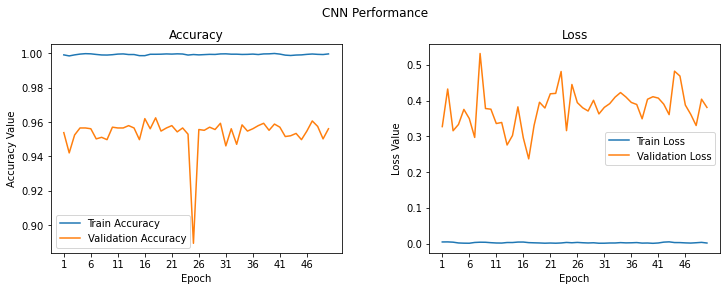

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")



In [62]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 2s 9ms/step - loss: 0.3687 - accuracy: 0.9552
Test_Accuracy: 95.52%


In [ ]:
predictions = model.predict()